In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme()
sns.set_context('talk')

In [2]:
abortion = pd.read_csv("abortion_laws.csv", skiprows=2)
abortion = abortion.drop(columns=["Footnotes"])
abortion = abortion[1:52]
abortion['Abortion Overview'] = 0
abortion.loc[(abortion['Pre-Roe Abortion Ban Still State Law'] == 'Yes') | (abortion['State Law Expressing Intent to Limit Abortion to Maximum Extent Permitted'] == 'Yes'),'Abortion Overview'] = 'significantly restricted'
abortion.loc[(abortion['State Law Protecting the Right to Abortion'] == 'Yes'),'Abortion Overview'] = 'protected'
abortion.loc[(abortion['Abortion Overview'] == 0),'Abortion Overview'] = 'neither'

In [3]:
childcare = pd.read_csv("childcare_states.csv", skiprows=1)
childcare = childcare[:51]

In [4]:
paid_leave = pd.read_csv("paid_leave_laws.csv", skiprows=1)
paid_leave = paid_leave.drop(["Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10"], axis=1)
paid_leave = paid_leave[:51]

In [5]:
df = abortion.merge(childcare, how='inner', left_on='Location', right_on="State")
all_data = df.merge(paid_leave, how='inner', left_on='Location', right_on="State")
all_data = all_data.drop(columns=["Location", "Pre-Roe Abortion Ban Still State Law", "State Law Expressing Intent to Limit Abortion to Maximum Extent Permitted", "State Law Protecting the Right to Abortion"])
all_data["Infant Care %"] = 0
for i in range(len(all_data["Cost of Infant Care as Percent of Women's Median Annual Earningsa,b"])):
    perc = all_data["Cost of Infant Care as Percent of Women's Median Annual Earningsa,b"][i]
    num = perc[0:len(perc)-1]
    all_data["Infant Care %"][i] = float(num)
all_data = all_data.sort_values(by=["Infant Care %"], ascending = False)
all_data.head()

<ipython-input-5-b97ccd5fcbd5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Infant Care %"][i] = float(num)


,Abortion Overview,State_x,"Average Annual Cost of Full-Time Infant Care in a Center as Percent of Women's Median Annual Earnings, 2013a","Cost of Infant Care as Percent of Women's Median Annual Earningsa,b",Rank_x,"Percent of Four-Year-Olds Enrolled in State Pre-K, Preschool Special Education, and State and Federal Head Start, 2012–2013c",Rank,"Preschool Quality Standards (out of 10), 2012–2013c",Rank.1,Child Care Total Score,Rank.2,State_y,Temporary Disability Insurance Statewidea,Paid Leave (for FMLA Related Reasons)a,Paid Sick Daysb,Paid Leave Legislation Total Score,Rank_y,Infant Care %
8,protected,District of Columbia,"$21,948",36.6%,51.0,100.0%,1.0,8.0,12.0,1.73,2.0,District of Columbia,No,No,State,0.67,5.0,36
23,neither,Minnesota,"$13,993",35.0%,50.0,15.2%,45.0,9.0,5.0,1.18,28.0,Minnesota,No,No,No,0.00,12.0,35
21,neither,Massachusetts,"$16,549",34.1%,49.0,25.3%,31.0,6.0,27.0,1.04,38.0,Massachusetts,No,No,State,0.67,5.0,34
32,protected,New York,"$14,508",33.1%,48.0,60.5%,10.0,7.0,21.0,1.38,14.0,New York,Yes,No,Local,1.00,4.0,33
5,neither,Colorado,"$13,143",32.9%,47.0,34.1%,26.0,6.0,27.0,1.11,31.0,Colorado,No,No,No,0.00,12.0,32


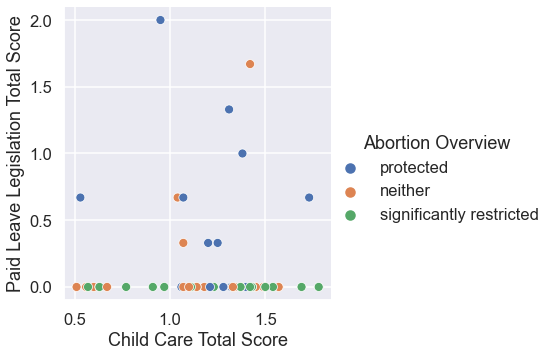

In [6]:
sns.relplot(data=all_data, x = "Child Care Total Score", y = "Paid Leave Legislation Total Score", hue = "Abortion Overview")

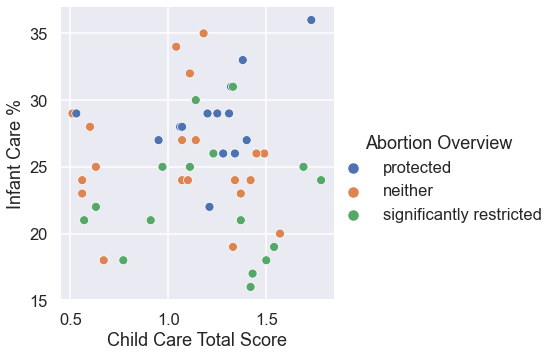

In [7]:
sns.relplot(data=all_data, x = "Child Care Total Score" ,
            y = "Infant Care %",
           hue = "Abortion Overview")

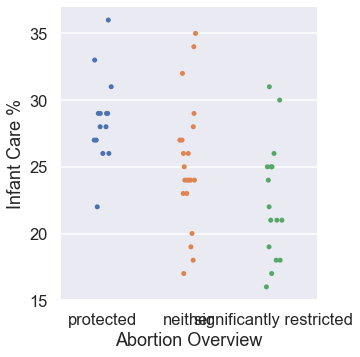

In [8]:
catplot = sns.catplot(data=all_data, x = "Abortion Overview",
            y = "Infant Care %")

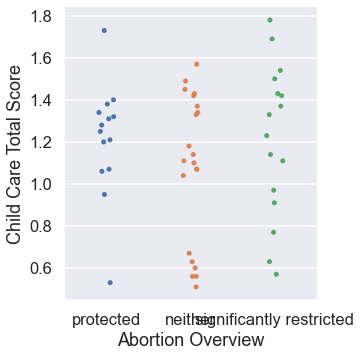

In [9]:
catplot2 = sns.catplot(data=all_data, x = "Abortion Overview",
            y = "Child Care Total Score")

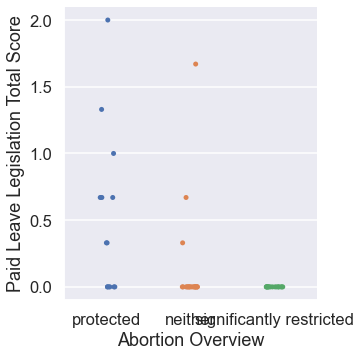

In [10]:
catplot = sns.catplot(data=all_data, x = "Abortion Overview",
            y = "Paid Leave Legislation Total Score")

In [11]:
# Insurance Stuff

In [12]:
def fix_data_types(df):
    df = df.infer_objects()
    df = df.astype({"statefips": str, "countyfips": str})
    df["countyfips"] = df["countyfips"].apply(lambda x: x.zfill(3))
    df["GEOID20"] = df["statefips"] + df["countyfips"]
    return df

In [13]:
sahie_2018 = pd.read_csv("sahie_2018.csv", header=68, dtype=str)
sahie_2018 = fix_data_types(sahie_2018)
sahie_2018 = sahie_2018.drop(columns=["statefips", "version", "year", "countyfips", "county_name", "Unnamed: 25", "GEOID20"])
sahie_2018 = sahie_2018[sahie_2018['racecat'] != '0']
sahie_2018 = sahie_2018[sahie_2018['sexcat'] != '0']
sahie_2018 = sahie_2018[sahie_2018['iprcat'] != '0']
sahie_2018['NUI'] = sahie_2018['NUI'].astype(int)
sahie_2018['NIPR'] = sahie_2018['NIPR'].astype(int)
sahie_2018['NIC'] = sahie_2018['NIC'].astype(int)
sahie_2018 = sahie_2018.reset_index()
sahie_2018['state'] = 0

for i in range(len(sahie_2018['state_name'])):
    state = sahie_2018['state_name'][i]
    stripped = state.strip()
    sahie_2018['state'][i] = stripped

sahie_2018 = sahie_2018.drop(columns=["state_name"])
sahie_2018

<ipython-input-13-1e9f214c4663>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sahie_2018['state'][i] = stripped
/Users/parkerfaircloth-henise/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,index,geocat,agecat,racecat,sexcat,iprcat,NIPR,nipr_moe,NUI,nui_moe,...,nic_moe,PCTUI,pctui_moe,PCTIC,pctic_moe,PCTELIG,pctelig_moe,PCTLIIC,pctliic_moe,state
0,25,40,0,1,1,1,326951,6982,73594,4581,...,6710,22.5,1.3,77.5,1.3,5.9,0.4,20.2,0.5,Alabama
1,26,40,0,1,1,2,432794,7411,89238,4989,...,7262,20.6,1.1,79.4,1.1,7.1,0.4,27.4,0.6,Alabama
2,27,40,0,1,1,3,200722,6082,49079,3723,...,5647,24.5,1.7,75.5,1.7,3.9,0.3,12.1,0.5,Alabama
3,28,40,0,1,1,4,737747,8441,118361,5860,...,8905,16.0,0.8,84.0,0.8,9.4,0.5,49.5,0.7,Alabama
4,29,40,0,1,1,5,537025,8078,69282,4008,...,8018,12.9,0.7,87.1,0.7,5.5,0.3,37.3,0.6,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,318085,40,5,3,2,1,5935,397,2399,427,...,458,40.4,6.6,59.6,6.6,16.8,3.0,24.8,3.2,Wyoming
7646,318086,40,5,3,2,2,7291,395,2835,468,...,498,38.9,6.0,61.1,6.0,19.9,3.3,31.2,3.5,Wyoming
7647,318087,40,5,3,2,3,3945,391,1665,344,...,375,42.2,7.6,57.8,7.6,11.7,2.4,16.0,2.6,Wyoming
7648,318088,40,5,3,2,4,10453,349,3603,545,...,575,34.5,5.1,65.5,5.1,25.2,3.8,48.0,4.0,Wyoming


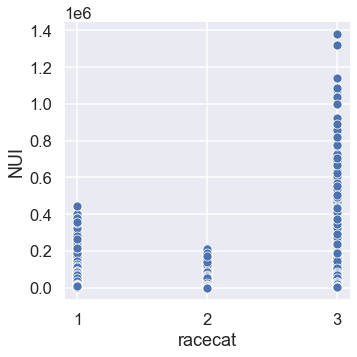

In [14]:
ax1 = sns.relplot(data=sahie_2018, x = "racecat", y="NUI")

In [15]:
combo = sahie_2018.merge(all_data, how='outer', left_on='state', right_on='State_x')
NUI_means = combo.groupby("state").mean()['NUI']
combo["NIPR:NUI"] = combo["NIPR"]/combo["NUI"]
combo['racecat'] = combo['racecat'].astype(float)
combo['iprcat'] = combo['iprcat'].astype(float)

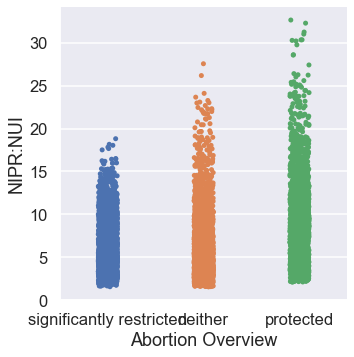

In [16]:
plot1 = sns.catplot(data=combo, x="Abortion Overview", y = "NIPR:NUI")

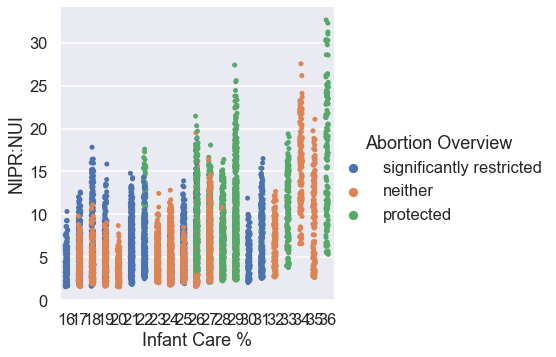

In [17]:
plot2 = sns.catplot(data=combo, x="Infant Care %", y = "NIPR:NUI", hue = "Abortion Overview")

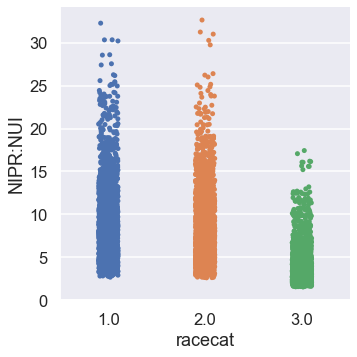

In [18]:
plot3 = sns.catplot(data=combo, x="racecat", y = "NIPR:NUI")

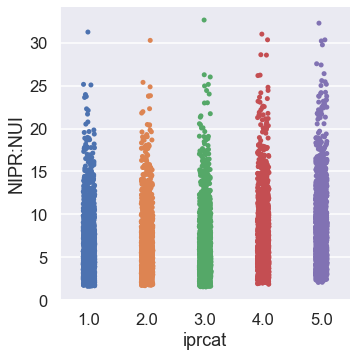

In [19]:
plot4 = sns.catplot(data=combo, x="iprcat", y = "NIPR:NUI")

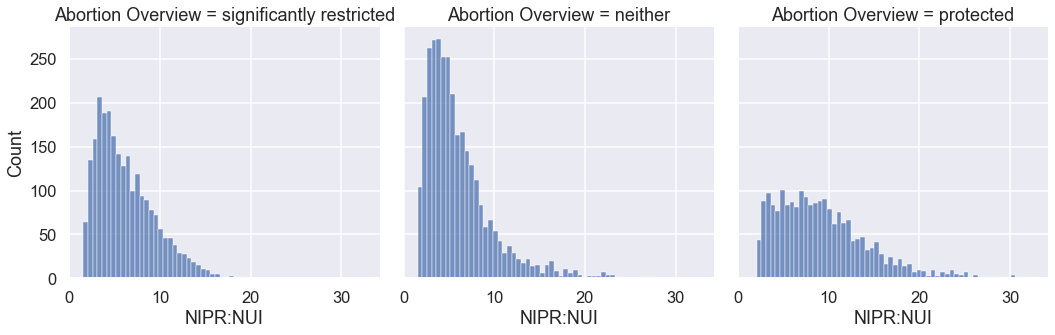

In [20]:
plot5 = sns.displot(data=combo, x='NIPR:NUI', col='Abortion Overview')

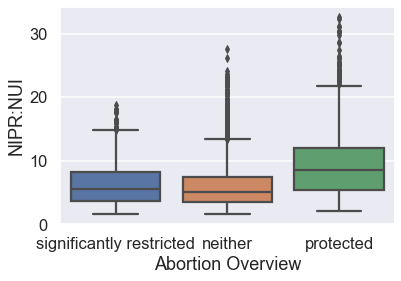

In [21]:
plot6 = sns.boxplot(x=combo['Abortion Overview'], y=combo['NIPR:NUI'])